## **TITANIC: 98.77%**

# **Introducción**

Parte fundamental del análisis de datos es la curiosidad. Lo que busco en el presente informe es exponer todos los arreglos que hice y tomé como referencia para poder llegar a la solución con la mayor exactitud que he podido encontrar. Así mismo, espero que este estudio sea una buena referencia para los que desean empezar en este mundo del DATA SCIENCE con problemas desarrollados, y que les ayude y les dé ideas para hacer arreglos en sus propios análisis.

Con respecto al desarrollo del problema, nos enfocaremos en hacer la mayor cantidad de arreglos que podamos en cada uno de los datos, creando nuevas columnas para finalmente combinarlas y buscar la formula para la solución con los arreglos más exactos.

Estuve varios dias intentando mejorar el 98.77% de mi resultado, pero fue lo mejor que pude conseguir. Animo a los lectores que intentan mas variaciones y muestren sus resultados para aprender todos juntos.

Para lograr dicho objetivo seguiremos los siguientes pasos:

1. Importación de datos
2. Análisis columna por columna
3. Elección de variables a evaluar
4. Aplicación de modelos
5. Elección del modelo y elaboración de conclusiones

Finalmente, y antes de empezar, pido disculpas si ven programación que puede ser resumida por bucles. Este es mi primer proyecto y definitivamente tengo mucho que aprender.

# **1. Importar datos**

Importamos las librerias que utilizaremos para esta etapa:

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Importamos los archivos csv y los convertimos en DataFrames:

In [95]:
train_df = pd.read_csv('/content/drive/MyDrive/Proyectos Colab/Titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Proyectos Colab/Titanic/test.csv')

El caso nos brinda el siguiente Diccionario de datos de las columnas de ambos DFs:

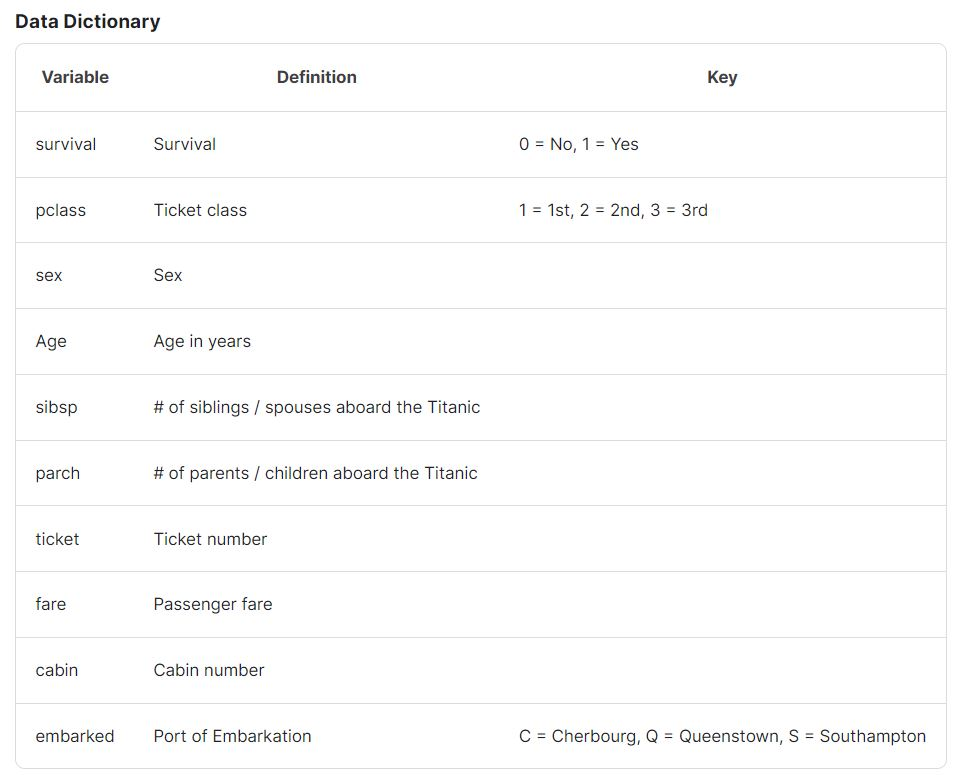



Busquemos valores nulos y conozcamos el tipo de dato en cada columna:

In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [98]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [99]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# **Analizamos Pclass**

Según lo que vimos anteriormente, **Pclass** no tiene valores nulos en ninguno de los dos grupos de datos. Analicemos sus valores:

In [100]:
train_df['Pclass'].unique()

array([3, 1, 2])

In [101]:
test_df['Pclass'].unique()

array([3, 2, 1])

La columan Pclass que nos indica la clase del ticket que compró cada pasajero, ya se encuentra en una variable categorica. No hacemos mayor arreglo a la columna **Pclass**.

# **Analizamos la columna Name**

Entendemos que los nombres de las personas serán variables muy dispersas, por ello, asumimos no estarán correlacionadas con el resultado final. Sin embargo, los títulos de cada una de las personas si podríamos clasificarlos. Para ello identificaremos todos los títulos de ambos grupos de datos y agregaremos una columna **Title**:

In [102]:
#Analizamos los nombres (sobre todo los títulos) de los pasajeros
train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.', expand= False)
test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.', expand= False)
print(pd.crosstab(train_df['Title'], train_df['Sex']))
print('-'*40)
print(pd.crosstab(test_df['Title'], test_df['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1
----------------------------------------
Sex     female  male
Title               
Col          0     2
Dona         1     0
Dr           0     1
Master       0    21
Miss        78     0
Mr           0   240
Mrs         72     0
Ms           1     0
Rev          0     2


Ahora reemplazaremos y clasificaremos los valores de la columna **Title** en 5  grupos, elegidos por coneniencia, para poder tener un mayor orden, y lo categorizaremos en números del 1 al 5.

In [103]:
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

In [104]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_df['Title'] = train_df['Title'].map(title_mapping)
train_df['Title'] = train_df['Title'].fillna(0)
test_df['Title'] = test_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].fillna(0)

Eliminaremos la columna **Name**, porque ya no la utilizarémos.

In [105]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1


# **Analizamos la columna Sex**

Dado que anteriormente revisamos que la columna **Sex** no cuenta con ningún valor nulo, procederemos a categorizar las en 1 o 0 según sean Femenino o masculino:

In [106]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1


# **Analizamos la columna Age**

Como vimos en la descripción inicial de los datos, en ambos grupos (tanto los de entreno como los de testeo) existen datos nulos, los cuales podremos ver:

In [107]:
print('La cantidad de datos NaN en train_df son ', train_df['Age'].isna().sum(), ', que representan el ',(train_df['Age'].isna().sum() / train_df.shape[0] * 100).round(2),'% de la muestra')
print('La cantidad de datos NaN en test_df son', test_df['Age'].isna().sum(), 'que representan el', (test_df['Age'].isna().sum() / test_df.shape[0] * 100).round(2), '% de la muestra')


La cantidad de datos NaN en train_df son  177 , que representan el  19.87 % de la muestra
La cantidad de datos NaN en test_df son 86 que representan el 20.57 % de la muestra


Aquí debido a la alta cantidad de valores nulos y a la amplitud de los datos, haremos los siguientes arreglos:

Haremos un **primer arreglo** a al edad de los pasajeros, creando la columna **AgeMean**, reemplazando los valores nulos de Age el promedio de todos.


In [108]:
train_df['AgeMean']=train_df['Age']
test_df['AgeMean']=test_df['Age']
train_age_mean = train_df['AgeMean'].mean()
test_age_mean = test_df['AgeMean'].mean()
train_df['AgeMean'].fillna(train_age_mean, inplace=True)
test_df['AgeMean'].fillna(test_age_mean, inplace=True)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeMean
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3,38.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,26.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,3,35.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1,35.0


Haremos un **segundo arreglo** de la edad de los pasajeros, agrupandolos en 5 sub grupos tomando en cuenta la columna AgeMean y creando la columna **AgeMGroup**:

In [109]:
train_df['AgeMGroup'] = pd.cut(train_df['AgeMean'], bins=range(0, 91, 10), labels=range(9), right=False).astype(float)
test_df['AgeMGroup'] = pd.cut(test_df['AgeMean'], bins=range(0, 91, 10), labels=range(9), right=False).astype(float)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeMean,AgeMGroup
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,2.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3,38.0,3.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,26.0,2.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,3,35.0,3.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1,35.0,3.0


**OJO:** Acá quisimos hacer dos arreglos más: reemplazando los datos NaN con los promedios dependiendo del sexo del pasajero y otro agrupando estos datos en 5 grupos (con los datos que resultaron dependiendo del promedio del sexo del pasajero). Los resultados fueron los mismos a los dos arreglos anteriores, sin considerar el sexo de los pasajeros. Por ello decidimos retirarlo del estudio.

Debido a la alta cantidad de valores NaN en el conjunto de datos, en el **tercer arreglo**, crearémos la columna de datos **AgeNaN** donde indicarémos que la edad de los valores NaN es 99 con el objetivo de, posteriormente, crear la columna **AgeNaNGroup** donde agruparémos las edades por décadas y así en el grupo 9 sólo estarían los valores NaN (reemplazados anteriormente por 99).



In [110]:
train_df['AgeNaN']=train_df['Age'].fillna(99)
test_df['AgeNaN']=test_df['Age'].fillna(99)
train_df['AgeNaNGroup'] = pd.cut(train_df['AgeNaN'], bins=range(0, 110, 10), labels=range(10), right=False).astype(float)
test_df['AgeNaNGroup'] = pd.cut(test_df['AgeNaN'], bins=range(0, 110, 10), labels=range(10), right=False).astype(float)

train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeMean,AgeMGroup,AgeNaN,AgeNaNGroup
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,2.0,22.0,2.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3,38.0,3.0,38.0,3.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,26.0,2.0,26.0,2.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,3,35.0,3.0,35.0,3.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1,35.0,3.0,35.0,3.0


# **Analizamos SibSp**

Anteriormente vimos que la columna **SibSp** no tenía valores nulos. Analicemos sus valores:

In [111]:
train_df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [112]:
test_df['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

Esta variable nos indica la cantidad de hermanos o cónyuges que tenía cada pasajero a bordo. Son variables categóricas y tienen una dispersión baja, por tanto no hacemos mayor arreglo.

**OJO** En algún estudio vimos que creaban una nueva columna llamada **FamilySize** donde sumaban los valores de SibSp, Parch y 1 (el pasajero). También hicimos este arreglo pero no nos mejoraba la exactitud por ello decidimos descartarlo.

# **Analizamos Parch**

Anteriormente vimos que la columna **Parch** no tenía valores nulos. Analicemos sus valores:

In [113]:
train_df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [114]:
test_df['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9])

Esta variable nos indica la cantidad de padres o hijos que tenía cada pasajero a bordo. Son variables categóricas y tienen una dispersión baja, por tanto no hacemos mayor arreglo.

# **Analizamos TICKET**

Anteriormente vimos que la columna **Ticket** no tenía valores nulos. Analicemos sus valores:

In [115]:
train_df['Ticket'].nunique()

681

In [116]:
test_df['Ticket'].nunique()

363

Estas variables tienen una alta disperción y es de tipo object (tiene letras y números). Por ello consideramos que no habrá correlación con el resultado final. Decidimos no considerar esta columna.

In [117]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)


# **Analizamos Fare**

Anteriormente vimos que la columna **Fare** tiene un valor nulo, el cual es:

In [118]:
print(f"La cantidad de datos nulos en train_df: {train_df['Fare'].isna().sum()} y de datos nulos en test_df: {test_df['Fare'].isna().sum()}")

La cantidad de datos nulos en train_df: 0 y de datos nulos en test_df: 1


Así mismo, anteriormente vimos que el valor máximo (512.32) está muy lejos del 75% de los datos mayores (31.50), por tanto analizamos la distribución de los datos:

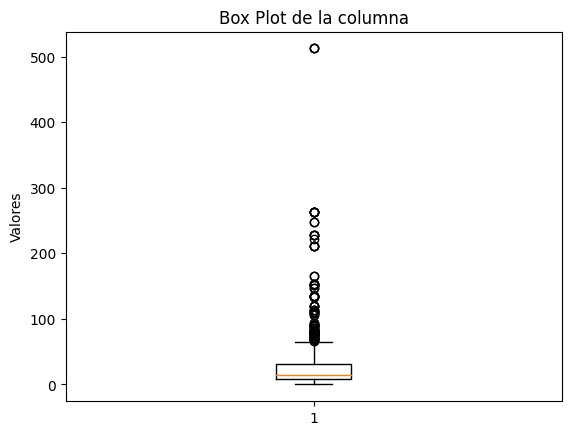

In [119]:
#Buscamos datos atípicos en train_df:
import matplotlib.pyplot as plt

plt.boxplot(train_df['Fare'])
plt.title('Box Plot de la columna')
plt.ylabel('Valores')
plt.show()

Con el Box Plot, podemos identificar claramente que existen valores atipicos dentro del conjunto de datos examinado. Para corregir dichos valores atípicos aplicaremos el método IterativeImputer de Sklearn. Creamos la columna **Fare_imputed** con dichos datos. Hacemos esto tanto en train_df,  como en test_df.

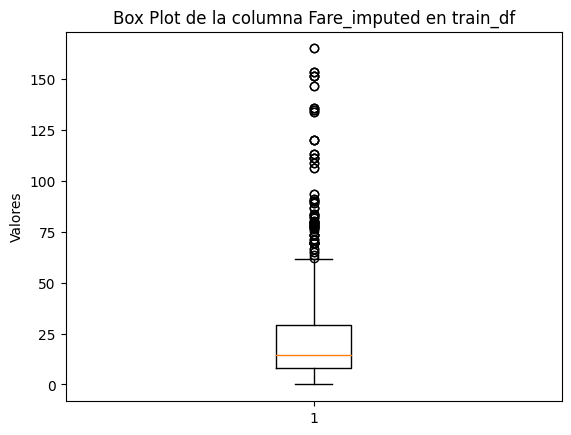

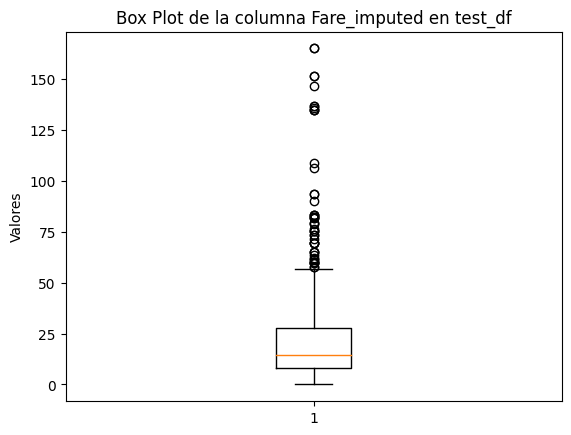

In [120]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

train_df['Fare_imputed']=train_df['Fare']
test_df['Fare_imputed']=test_df['Fare']

# Calcular la media y la desviación estándar
mean_train = train_df['Fare_imputed'].mean()
mean_test = test_df['Fare_imputed'].mean()
std_train = train_df['Fare_imputed'].std()
std_test = test_df['Fare_imputed'].std()

# Calcular el Z-Score
train_df['z_score'] = (train_df['Fare_imputed'] - mean_train) / std_train
test_df['z_score'] = (test_df['Fare_imputed'] - mean_test) / std_test

# Identificar outliers
outliers_z_score = train_df[np.abs(train_df['z_score']) > 3]
outliers_z_score = test_df[np.abs(test_df['z_score']) > 3]

# Reemplazar los outliers con NaN
train_df.loc[np.abs(train_df['z_score']) > 3, 'Fare_imputed'] = np.nan
test_df.loc[np.abs(test_df['z_score']) > 3, 'Fare_imputed'] = np.nan

# Eliminar la columna z_score antes de imputar
train_df = train_df.drop(columns=['z_score'])
test_df = test_df.drop(columns=['z_score'])

# Aplicar IterativeImputer solo a la columna 'Fare'
imputer = IterativeImputer(max_iter=10, random_state=0)

# Necesitamos transformar 'Fare' en un DataFrame para el imputador
fare_imputed_train = imputer.fit_transform(train_df[['Fare_imputed']])
fare_imputed_test = imputer.fit_transform(test_df[['Fare_imputed']])

# Sustituir la columna 'Fare' con los valores imputados en el DataFrame original
train_df['Fare_imputed'] = fare_imputed_train
test_df['Fare_imputed'] = fare_imputed_test


plt.boxplot(train_df['Fare_imputed'])
plt.title('Box Plot de la columna Fare_imputed en train_df')
plt.ylabel('Valores')
plt.show()


plt.boxplot(test_df['Fare_imputed'])
plt.title('Box Plot de la columna Fare_imputed en test_df')
plt.ylabel('Valores')
plt.show()

In [121]:
print(train_df[['Fare_imputed']].describe())
print('-'*20)
print(test_df[['Fare_imputed']].describe())

       Fare_imputed
count    891.000000
mean      26.530170
std       29.019521
min        0.000000
25%        7.910400
50%       14.454200
75%       29.412500
max      164.866700
--------------------
       Fare_imputed
count    418.000000
mean      25.836122
std       28.302421
min        0.000000
25%        7.895800
50%       14.454200
75%       27.652050
max      164.866700


Con este arreglo también hemos solucionado el problema de los datos nulos:

In [122]:
print(f"La cantidad de datos nulos en train_df: {train_df['Fare_imputed'].isna().sum()} y de datos nulos en test_df: {test_df['Fare_imputed'].isna().sum()}")

La cantidad de datos nulos en train_df: 0 y de datos nulos en test_df: 0


# **Analizamos Cabin**

Anteriormente vimos que la columna **Cabin** si tenía valores nulos. Básicamente los valores nulos son:

In [123]:
print('La cantidad de datos NaN en train_df son ', train_df['Cabin'].isna().sum(), ', que representan el ',(train_df['Cabin'].isna().sum() / train_df.shape[0] * 100).round(2),'% de la muestra')
print('La cantidad de datos NaN en test_df son ', test_df['Cabin'].isna().sum(), ', que representan el ',(test_df['Cabin'].isna().sum() / test_df.shape[0] * 100).round(2),'% de la muestra')

La cantidad de datos NaN en train_df son  687 , que representan el  77.1 % de la muestra
La cantidad de datos NaN en test_df son  327 , que representan el  78.23 % de la muestra


Analicemos con qué valores únicos empiezan sus datos:

In [124]:
train_df['Cabin'].dropna().astype(str).str[0].unique()


array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [125]:
cap_letters = train_df['Cabin'].dropna().astype(str).str[0]
letters = cap_letters.value_counts()
letters

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

Por un lado, agrupamos las cabinas según sus letras iniciales (del 1 al 8), y por otro lado, hacemos un grupo (el grupo 9) con los datos NaN.

In [126]:
# Función para reemplazar según las reglas.
def replace_value(value):
    if pd.isna(value):
        return 9
    if value.startswith('A'):
        return 1
    elif value.startswith('B'):
        return 2
    elif value.startswith('C'):
        return 3
    elif value.startswith('D'):
        return 4
    elif value.startswith('E'):
        return 5
    elif value.startswith('F'):
        return 6
    elif value.startswith('G'):
        return 7
    elif value.startswith('T'):
        return 8
    else:
        return 9

train_df['Cabin'] = train_df['Cabin'].apply(replace_value)
test_df['Cabin'] = test_df['Cabin'].apply(replace_value)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeMean,AgeMGroup,AgeNaN,AgeNaNGroup,Fare_imputed
0,1,0,3,0,22.0,1,0,7.2500,9,S,1,22.0,2.0,22.0,2.0,7.2500
1,2,1,1,1,38.0,1,0,71.2833,3,C,3,38.0,3.0,38.0,3.0,71.2833
2,3,1,3,1,26.0,0,0,7.9250,9,S,2,26.0,2.0,26.0,2.0,7.9250
3,4,1,1,1,35.0,1,0,53.1000,3,S,3,35.0,3.0,35.0,3.0,53.1000
4,5,0,3,0,35.0,0,0,8.0500,9,S,1,35.0,3.0,35.0,3.0,8.0500


# **Analizamos Embarked**

Como vimos anteriormente, la columna **Embarked** tiene 2 valores NaN en train_df y ninguno en test_df:

In [127]:
print('La cantidad de datos NaN en train_df son ', train_df['Embarked'].isna().sum())
print('La cantidad de datos NaN en test_df son ', test_df['Embarked'].isna().sum())

La cantidad de datos NaN en train_df son  2
La cantidad de datos NaN en test_df son  0


Ahora veamos los tipos de datos que tiene la variable **Embarked**:

In [128]:
test_df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

Dado que sólo tiene 3 tipos de datos, reemplazaremos los datos NaN por la moda:

In [129]:
train_embarked_mode = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(train_embarked_mode, inplace=True)

Para propósitos de nuestro análisis, convertiremos los datos de **Embarked** en variables categóricas:

In [130]:

train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeMean,AgeMGroup,AgeNaN,AgeNaNGroup,Fare_imputed
0,1,0,3,0,22.0,1,0,7.2500,9,0,1,22.0,2.0,22.0,2.0,7.2500
1,2,1,1,1,38.0,1,0,71.2833,3,1,3,38.0,3.0,38.0,3.0,71.2833
2,3,1,3,1,26.0,0,0,7.9250,9,0,2,26.0,2.0,26.0,2.0,7.9250
3,4,1,1,1,35.0,1,0,53.1000,3,0,3,35.0,3.0,35.0,3.0,53.1000
4,5,0,3,0,35.0,0,0,8.0500,9,0,1,35.0,3.0,35.0,3.0,8.0500


# **Elección de variables a evaluar**

Verificamos cómo quedaron las variables en ambos DataFrames:

In [131]:
train_df.info()
print("-"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Sex           891 non-null    int64  
 4   Age           714 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Fare          891 non-null    float64
 8   Cabin         891 non-null    int64  
 9   Embarked      891 non-null    int64  
 10  Title         891 non-null    int64  
 11  AgeMean       891 non-null    float64
 12  AgeMGroup     891 non-null    float64
 13  AgeNaN        891 non-null    float64
 14  AgeNaNGroup   891 non-null    float64
 15  Fare_imputed  891 non-null    float64
dtypes: float64(7), int64(9)
memory usage: 111.5 KB
----------------------------------------
<class 'pandas.core.frame.Da

Elegiremos por conveniencia los siguientes grupos de evaluación:

In [132]:
train_dfs = {
'train_Data_1':train_df[['Survived','Pclass','Sex','AgeMean','SibSp','Parch','Fare','Cabin','Embarked','Title']],
'train_Data_2':train_df[['Survived','Pclass','Sex','AgeMGroup','SibSp','Parch','Fare','Cabin','Embarked','Title']],
'train_Data_3':train_df[['Survived','Pclass','Sex','AgeNaNGroup','SibSp','Parch','Fare','Cabin','Embarked','Title']],
'train_Data_4':train_df[['Survived','Pclass','Sex','AgeMean','SibSp','Parch','Fare_imputed','Cabin','Embarked','Title']],
'train_Data_5':train_df[['Survived','Pclass','Sex','AgeMGroup','SibSp','Parch','Fare_imputed','Cabin','Embarked','Title']],
'train_Data_6':train_df[['Survived','Pclass','Sex','AgeNaNGroup','SibSp','Parch','Fare_imputed','Cabin','Embarked','Title']]
}

test_dfs = {
'test_Data_1':test_df[['PassengerId','Pclass','Sex','AgeMean','SibSp','Parch','Fare','Cabin','Embarked','Title']],
'test_Data_2':test_df[['PassengerId','Pclass','Sex','AgeMGroup','SibSp','Parch','Fare','Cabin','Embarked','Title']],
'test_Data_3':test_df[['PassengerId','Pclass','Sex','AgeNaNGroup','SibSp','Parch','Fare','Cabin','Embarked','Title']],
'test_Data_4':test_df[['PassengerId','Pclass','Sex','AgeMean','SibSp','Parch','Fare_imputed','Cabin','Embarked','Title']],
'test_Data_5':test_df[['PassengerId','Pclass','Sex','AgeMGroup','SibSp','Parch','Fare_imputed','Cabin','Embarked','Title']],
'test_Data_6':test_df[['PassengerId','Pclass','Sex','AgeNaNGroup','SibSp','Parch','Fare_imputed','Cabin','Embarked','Title']]

}



# **Aplicación de Modelos**

Para el análisis de datos hemos elegido los siguientes modelos a aplicar:



1. **Logistic Regression**: Modelo lineal usado para clasificación binaria; estima la probabilidad de una clase mediante la función logística (sigmoide).
2. **SVM (Support Vector Machine)**: Algoritmo de clasificación que encuentra el hiperplano que mejor separa las clases en el espacio de características, maximizando el margen entre las clases.
3. **KNN (K-Nearest Neighbors)**: Algoritmo de clasificación que asigna una clase a un punto basándose en las clases de sus k vecinos más cercanos.
4. **Gaussian (Gaussian Naive Bayes)**: Clasificador probabilístico que asume que las características siguen una distribución normal (gaussiana).
5. **Perceptron**: Algoritmo de aprendizaje supervisado para clasificación binaria; una red neuronal de una sola capa que ajusta pesos iterativamente para separar las clases.
6. **SVC (Support Vector Classifier)**: Variante del SVM que permite el uso de diferentes kernels para manejar datos no lineales.
7. **Linear_SVC (Linear Support Vector Classifier)**: Variante de SVM que utiliza un kernel lineal, ideal para problemas linealmente separables.
8. **SGD (Stochastic Gradient Descent)**: Método de optimización iterativa utilizado para ajustar los parámetros de modelos lineales como la regresión logística o SVM, procesando un ejemplo a la vez.
9. **Decision Tree**: Modelo basado en árbol que toma decisiones de clasificación dividiendo los datos en subconjuntos basados en valores de características, formando una estructura de árbol.
10. **Random Forest**: Ensamble de múltiples árboles de decisión que mejora la precisión y reduce el sobreajuste mediante la agregación de los resultados de varios árboles.
11. **Gradient Boosting**: Técnica de ensamble que crea un modelo fuerte a partir de varios modelos débiles, entrenándolos secuencialmente y corrigiendo errores de los modelos anteriores.
12. **LGBM Classifier (LightGBM)**: Variante de Gradient Boosting que es más rápida y eficiente en el manejo de grandes volúmenes de datos y características.
13. **XGBRF Classifier (XGBoost with Random Forest)**: Variante de XGBoost que combina la eficiencia del Boosting con la robustez de los Random Forest, usando técnicas avanzadas de optimización y regularización.

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBRFClassifier

In [135]:
X_train = {}
Y_train = {}
X_test = {}

for i in range(1,7):
    train_df_name = f"train_Data_{i}"
    test_df_name = f"test_Data_{i}"

    X_train[train_df_name] = train_dfs[train_df_name].drop(["Survived"], axis=1)
    Y_train[train_df_name] = train_dfs[train_df_name]["Survived"]
    X_test[test_df_name] = test_dfs[test_df_name].drop(["PassengerId"], axis=1).copy()

In [87]:

# Inicializar diccionarios para almacenar las precisiones
acc_log = {}
acc_svc = {}
acc_knn = {}
acc_gaussian = {}
acc_perceptron = {}
acc_linear_svc = {}
acc_sgd = {}
acc_decision_tree = {}
acc_random_forest = {}
acc_gradient_boosting = {}
acc_lgbm = {}
acc_xgbrf = {}

# Función para entrenar y evaluar un modelo
def train_and_evaluate(model, X_train, Y_train, X_test):
    model.fit(X_train, Y_train)

    accuracy = round(model.score(X_train, Y_train) * 100, 2)
    return accuracy

# Entrenar y evaluar los modelos
for i in range(1, 7):
    train_df_name = f"train_Data_{i}"
    test_df_name = f"test_Data_{i}"

    # Logistic Regression
    logreg = LogisticRegression()
    acc_log[test_df_name] = train_and_evaluate(logreg, X_train[train_df_name], Y_train[train_df_name], X_test[test_df_name])

    # SVC
    svc = SVC()
    acc_svc[test_df_name] = train_and_evaluate(svc, X_train[train_df_name], Y_train[train_df_name], X_test[test_df_name])

    # KNN
    knn = KNeighborsClassifier(n_neighbors=3)
    acc_knn[test_df_name] = train_and_evaluate(knn, X_train[train_df_name], Y_train[train_df_name], X_test[test_df_name])

    # Gaussian Naive Bayes
    gaussian = GaussianNB()
    acc_gaussian[test_df_name] = train_and_evaluate(gaussian, X_train[train_df_name], Y_train[train_df_name], X_test[test_df_name])

    # Perceptron
    perceptron = Perceptron()
    acc_perceptron[test_df_name] = train_and_evaluate(perceptron, X_train[train_df_name], Y_train[train_df_name], X_test[test_df_name])

    # SVC
    svc = SVC()
    acc_svc[test_df_name] = train_and_evaluate(svc, X_train[train_df_name], Y_train[train_df_name], X_test[test_df_name])

    # Linear SVC
    linear_svc = LinearSVC()
    acc_linear_svc[test_df_name] = train_and_evaluate(linear_svc, X_train[train_df_name], Y_train[train_df_name], X_test[test_df_name])

    # Stochastic Gradient Descent
    sgd = SGDClassifier()
    acc_sgd[test_df_name] = train_and_evaluate(sgd, X_train[train_df_name], Y_train[train_df_name], X_test[test_df_name])

    # Decision Tree
    decision_tree = DecisionTreeClassifier()
    acc_decision_treed[test_df_name] = train_and_evaluate(decision_tree, X_train[train_df_name], Y_train[train_df_name], X_test[test_df_name])

    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=100)
    acc_random_forest[test_df_name] = train_and_evaluate(random_forest, X_train[train_df_name], Y_train[train_df_name], X_test[test_df_name])

   # Gradient Boosting Classifier
    gradient_boosting = GradientBoostingClassifier()
    acc_gradient_boosting[test_df_name] = train_and_evaluate(gradient_boosting, X_train[train_df_name], Y_train[train_df_name], X_test[test_df_name])

    # LGBM Classifier
    lgbm = LGBMClassifier()
    acc_lgbm[test_df_name] = train_and_evaluate(lgbm, X_train[train_df_name], Y_train[train_df_name], X_test[test_df_name])

    # XGBRF Classifier
    xgbrf = XGBRFClassifier()
    acc_xgbrf[test_df_name] = train_and_evaluate(xgbrf, X_train[train_df_name], Y_train[train_df_name], X_test[test_df_name])



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Creamos un DataFrame para visualizar los resultados:

In [88]:
# Crear el DataFrame de resultados
results = pd.DataFrame({
    "MODEL": ["Logistic Regression", "SVM", "KNN", "Gaussian", "Perceptron","SVC", "Linear_CSV", "SGD", "Decision Tree", "Random Forest", "Gradient_Boosting", "LGBM Classifier", "XGBRF Classifier" ],
1: [acc_log['test_Data_1'], acc_svc['test_Data_1'], acc_knn['test_Data_1'], acc_gaussian['test_Data_1'], acc_perceptron['test_Data_1'], acc_svc['test_Data_1'], acc_linear_svc['test_Data_1'], acc_sgd['test_Data_1'], acc_decision_treed['test_Data_1'], acc_random_forest['test_Data_1'], acc_gradient_boosting['test_Data_1'], acc_lgbm['test_Data_1'], acc_xgbrf['test_Data_1']],
2: [acc_log['test_Data_2'], acc_svc['test_Data_2'], acc_knn['test_Data_2'], acc_gaussian['test_Data_2'], acc_perceptron['test_Data_2'], acc_svc['test_Data_2'], acc_linear_svc['test_Data_2'], acc_sgd['test_Data_2'], acc_decision_treed['test_Data_2'], acc_random_forest['test_Data_2'], acc_gradient_boosting['test_Data_2'], acc_lgbm['test_Data_2'], acc_xgbrf['test_Data_2']],
3: [acc_log['test_Data_3'], acc_svc['test_Data_3'], acc_knn['test_Data_3'], acc_gaussian['test_Data_3'], acc_perceptron['test_Data_3'], acc_svc['test_Data_3'], acc_linear_svc['test_Data_3'], acc_sgd['test_Data_3'], acc_decision_treed['test_Data_3'], acc_random_forest['test_Data_3'], acc_gradient_boosting['test_Data_3'], acc_lgbm['test_Data_3'], acc_xgbrf['test_Data_3']],
4: [acc_log['test_Data_4'], acc_svc['test_Data_4'], acc_knn['test_Data_4'], acc_gaussian['test_Data_4'], acc_perceptron['test_Data_4'], acc_svc['test_Data_4'], acc_linear_svc['test_Data_4'], acc_sgd['test_Data_4'], acc_decision_treed['test_Data_4'], acc_random_forest['test_Data_4'], acc_gradient_boosting['test_Data_4'], acc_lgbm['test_Data_4'], acc_xgbrf['test_Data_4']],
5: [acc_log['test_Data_5'], acc_svc['test_Data_5'], acc_knn['test_Data_5'], acc_gaussian['test_Data_5'], acc_perceptron['test_Data_5'], acc_svc['test_Data_5'], acc_linear_svc['test_Data_5'], acc_sgd['test_Data_5'], acc_decision_treed['test_Data_5'], acc_random_forest['test_Data_5'], acc_gradient_boosting['test_Data_5'], acc_lgbm['test_Data_5'], acc_xgbrf['test_Data_5']],
6: [acc_log['test_Data_6'], acc_svc['test_Data_6'], acc_knn['test_Data_6'], acc_gaussian['test_Data_6'], acc_perceptron['test_Data_6'], acc_svc['test_Data_6'], acc_linear_svc['test_Data_6'], acc_sgd['test_Data_6'], acc_decision_treed['test_Data_6'], acc_random_forest['test_Data_6'], acc_gradient_boosting['test_Data_6'], acc_lgbm['test_Data_6'], acc_xgbrf['test_Data_6']]
})

results


,MODEL,1,2,3,4,5,6
0,Logistic Regression,81.14,81.26,80.70,81.26,81.26,80.58
1,SVM,68.80,68.91,68.91,72.05,70.03,70.03
2,KNN,84.74,86.64,87.54,85.52,87.09,87.65
3,Gaussian,77.78,77.33,77.67,77.67,77.33,77.67
4,Perceptron,56.23,69.47,70.71,73.40,62.63,65.43
5,SVC,68.80,68.91,68.91,72.05,70.03,70.03
6,Linear_CSV,75.42,75.98,80.13,69.81,80.13,79.80
7,SGD,77.67,73.51,77.89,79.91,65.54,68.80
8,Decision Tree,98.77,95.51,96.41,98.77,95.51,96.41
9,Random Forest,98.77,95.51,96.41,98.77,95.51,96.41


# **Elección del modelo y elaboración de conclusiones**

Finalmente podemos concluir lo siguiente:

In [89]:
# Encontrar el valor máximo en todo el DataFrame
max_value = results.iloc[:, 1:].values.max()

# Inicializar una lista para almacenar todas las coordenadas donde se encuentra el valor máximo
max_value_coordinates = []

# Iterar sobre cada celda del DataFrame
for i in range(results.shape[0]):
    for j in range(1, results.shape[1]):
        if results.iloc[i, j] == max_value:
            max_value_coordinates.append((i, j))

# Imprimir el valor máximo y todas sus coordenadas
print("La mayor exactitud de los modelos aplicados es:\033[1m", max_value,"\033[0m%, el cual es el resultado de aplicar las siguientes combinaciones:\n")

# Diccionario para mapear índices de columnas a nombres en test_dfs
test_data_map = {i: f'test_Data_{i}' for i in range(1, len(results.columns))}

# Iterar sobre las coordenadas para encontrar las columnas correspondientes en test_dfs
for coord in max_value_coordinates:
    model_name = results.iloc[coord[0], 0]
    test_data_name = test_data_map[coord[1]]
    test_columns = test_dfs[test_data_name].columns.tolist()

    print(f"Modelo \033[1m'{model_name}'\033[0m en \033[1m'{test_data_name}'\033[0m con las columnas {test_columns}\n")

La mayor exactitud de los modelos aplicados es: 98.77 %, el cual es el resultado de aplicar las siguientes combinaciones:

Modelo 'Decision Tree' en 'test_Data_1' con las columnas ['PassengerId', 'Pclass', 'Sex', 'AgeMean', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Title']

Modelo 'Decision Tree' en 'test_Data_4' con las columnas ['PassengerId', 'Pclass', 'Sex', 'AgeMean', 'SibSp', 'Parch', 'Fare_imputed', 'Cabin', 'Embarked', 'Title']

Modelo 'Random Forest' en 'test_Data_1' con las columnas ['PassengerId', 'Pclass', 'Sex', 'AgeMean', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Title']

Modelo 'Random Forest' en 'test_Data_4' con las columnas ['PassengerId', 'Pclass', 'Sex', 'AgeMean', 'SibSp', 'Parch', 'Fare_imputed', 'Cabin', 'Embarked', 'Title']



Principalmente porque la columna de datos Fare en test_df tiene un valor nulo, utilizarémos el modelo **'DecisionTree** con **'test_Data_4'** (el cual tiene el Fare_imputed con el valor nulo reemplazado) para generar los resultados en **'submission.csv'**.



In [142]:
# Definir los conjuntos de datos de entrenamiento y prueba específicos
train_df = train_dfs['train_Data_4']
test_df = test_dfs['test_Data_4']

# Preparar los datos
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1)

# Entrenar el modelo Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

# Realizar predicciones
Y_test_predictions = decision_tree.predict(X_test)

# Crear un DataFrame con las predicciones
Y_test = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': Y_test_predictions})

# Guardar las predicciones en un archivo CSV
Y_test.to_csv('submission.csv', index=False)

# Imprimir un mensaje confirmando que se ha guardado el archivo
print(f"Predicciones guardadas en 'submission.csv' usando el modelo Decision Tree y el conjunto de datos test_Data_4.")


Predicciones guardadas en 'submission.csv' usando el modelo Decision Tree y el conjunto de datos test_Data_4.


**Nuestro resultado fue 98.77%, ¿Conoces algun arreglo de datos para mejorar el modelo?**